# Measuring efficiency

## Import

In [35]:
import pandas as pd
import numpy as np

In [36]:
L2_TARGET = 0.01160101
CLSCOEF_TARGET = 0.267977
T2_TARGET = 0.02666667

## Reading our dataset

In [37]:
FILENAME = "NGEN=10000"

In [38]:
df = pd.read_csv(FILENAME + ".csv")
df = df.drop("Unnamed: 0", axis=1)

In [39]:
df.head

<bound method NDFrame.head of            x         y  label
0   1.078832  0.035897      1
1   0.790749 -0.457696      1
2  -0.079198  1.301411      1
3  -0.219274 -0.575418      0
4   0.649963  0.213555      1
..       ...       ...    ...
95  1.003387 -0.709401      1
96  0.600579 -0.164987      0
97  0.524093 -0.323359      0
98 -0.355657 -0.129186      1
99  0.373040 -0.513556      1

[100 rows x 3 columns]>

## Measuring Complexity

### Setting up `ECOL`

In [40]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1)  # select the first mirror in the list

# Install the ECoL package
utils.install_packages("ECoL")

# Import Ecol
ecol = rpackages.importr('ECoL')


R[write to console]: Installing package into ‘/home/steffanop/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ECoL_0.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22430 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

### Measuring our complexity

In [41]:
from rpy2.robjects import pandas2ri
from rpy2.robjects import Formula

pandas2ri.activate()

# Convert to r_df
r_df = pandas2ri.py2rpy(df)
fml = Formula('label ~ .')

#### L2 - clscoef - T2

In [43]:
l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

clscoefVector = ecol.network_formula(fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)
clscoef = clscoef[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target':[L2_TARGET,CLSCOEF_TARGET,T2_TARGET],'Result':[l2,clscoef,t2]}

## Taking a look at the efficiency

<AxesSubplot:>

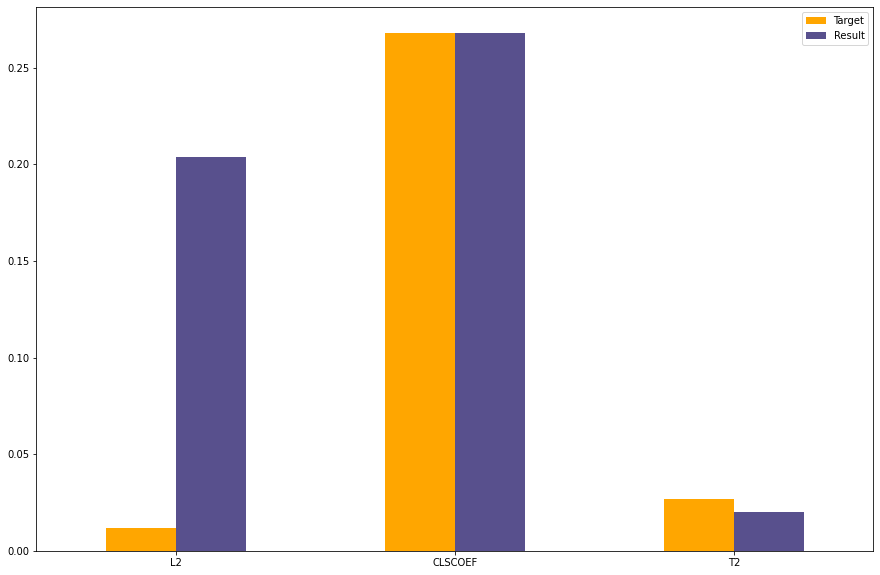

In [79]:
df_plot = pd.DataFrame(data, index=['L2','CLSCOEF','T2'])
df_plot.plot.bar(figsize=(15, 10), rot=0, color=['#ffa600', '#58508d'])
